<a href="https://www.kaggle.com/code/dascient/analysis-the-national-ufo-uap-reporting-center?scriptVersionId=126304420" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# NUFORC Data Exploitation 🧮AI-ML-DS📊 & More to Come🪐
## 🔭Research, 📈Analysis, 🌌A Multiversal Effort of Investigating Something More Extraordinary Than Ourselves, & 🤖Pure Enjoyment

### An attempt to exploit NUFORC's public 📘 reports of first-hand sightings/experiences of [Anomalous Phenomena](https://en.wikipedia.org/wiki/Association_for_the_Scientific_Study_of_Anomalous_Phenomena). Please see [NUFORC](https://nuforc.org/databank/)'s webpage to get a better understanding of the nature of the data. 


#### This project is also very much a work-in-progress. We intend to leverage other public/open-source databases to further our research (i.e. 🛩️commercial air traffic data, 🚁multi-domain track-correlation analysis, and so on) & investigative methods by aiming to aggregate pertinent resources that will serve to augment reproducible scalability of it's applications & the overall *purpose* of our ultimate mission. 


## A Collaborative Effort 🌎

Inspired by: [Mr. Tim Ventura](https://www.youtube.com/channel/UCl1ewEFZwBOTU2I_f0XiSUA) & all you nerdy UAP enthusiasts out there. Let's take this interstellar, and BEYOND!

| [Don's LinkedIn](https://www.linkedin.com/in/dontadaya/) | [Tim's LinkedIn](https://www.linkedin.com/in/timothyventura/) | [Gary's LinkedIn](https://www.linkedin.com/in/garv-gary-van-stephenson-963ba36/) | [Omariba's LinkedIn](https://www.linkedin.com/in/omariba-collins-b28b841b9/) |


### - Before we get into it -
### Let's all say thanks to [NUFORC](https://nuforc.org/databank/) for sharing the data!
### And most especially a tremendous applause to [Mr. Omariba Collins](https://www.linkedin.com/in/omariba-collins-b28b841b9/) for bringing this phat csv into Kags. 

Feel free to fork, cite, manipulate, scrutinize, comment, and provide insights you deem worthy.

#  Loading our packages & NUFORC's 80K dataset as a csv. 

#### *I hope this serves you something delightful.*



In [1]:
# This Python 3 Analysis of NUFORC's database contains 80,0000 rows of reported sightings. 
# I'm so glad this one came with Lat/Long,s for me to play with.

# for the sake of expeditious analysis
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ufo-sightings/ufos.csv


# What does the data look like?

In [2]:
# loading...
df = pd.read_csv('/kaggle/input/ufo-sightings/ufos.csv',header=0)

# drop some columns, for now
df = df.drop(columns=['datetime','duration (hours/min)'])

# date posted deemed to be easily conveible to timestamp values, so i'm gonna work with that for now.
df['date posted'] = df['date posted'].astype('datetime64[ns]')

# show
df.head(15).sort_values('date posted',ascending=False).reset_index(drop=True)

city state country     shape  duration (seconds)  \
0              lexington    nc      us      oval                30.0   
1              pell city    al      us      disk               180.0   
2                brevard    nc      us  fireball               180.0   
3             manchester    ky      us   unknown               180.0   
4   chester (uk/england)   NaN      gb    circle                20.0   
5                bristol    tn      us    sphere               300.0   
6     penarth (uk/wales)   NaN      gb    circle               180.0   
7           lackland afb    tx     NaN     light              7200.0   
8               live oak    fl      us      disk               120.0   
9             san marcos    tx      us  cylinder              2700.0   
10               kaneohe    hi      us     light               900.0   
11                  edna    tx      us    circle                20.0   
12             hawthorne    ca      us    circle               300.0   
13              bellmore    ny      us      disk              1800.0   
14               norwalk    ct      us      disk              1200.0   

                                             comments date posted   latitude  \
0   green oval shaped light over my local church&#...  2010-02-14  35.823889   
1   Strobe Lighted disk shape object observed clos...  2009-03-19  33.586111   
2   silent red /orange mass of energy floated by t...  2008-06-12  35.233333   
3   Slow moving&#44 silent craft accelerated at an...  2008-02-14  37.153611   
4   Green/Orange circular disc over Chester&#44 En...  2008-01-21  53.200000   
5   My father is now 89 my brother 52 the girl wit...  2007-04-27  36.595000   
6   penarth uk  circle  3mins  stayed 30ft above m...  2006-02-14  51.434722   
7   1949 Lackland AFB&#44 TX.  Lights racing acros...  2005-12-16  29.384210   
8   Saucer zaps energy from powerline as my pregna...  2005-05-11  30.294722   
9   This event took place in early fall around 194...  2004-04-27  29.883056   
10  AS a Marine 1st Lt. flying an FJ4B fighter/att...  2004-01-22  21.418056   
11  My older brother and twin sister were leaving ...  2004-01-17  28.978333   
12  ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...  2003-10-31  33.916389   
13           silver disc seen by family and neighbors  2000-05-11  40.668611   
14  A bright orange color changing to reddish colo...  1999-10-02  41.117500   

     longitude  
0   -80.253611  
1   -86.286111  
2   -82.734444  
3   -83.761944  
4    -2.916667  
5   -82.188889  
6    -3.180000  
7   -98.581082  
8   -82.984167  
9   -97.941111  
10 -157.803611  
11  -96.645833  
12 -118.351667  
13  -73.527500  
14  -73.408333

Varying Shapes - To Explore

In [43]:
df['shape'].value_counts()

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: shape, dtype: int64

## Duration, Lat, Lon - numerical insight.



In [3]:
df.describe()

duration (seconds)      latitude     longitude
count        8.033200e+04  80332.000000  80332.000000
mean         9.016889e+03     38.124416    -86.772885
std          6.202168e+05     10.469585     39.697205
min          1.000000e-03    -82.862752   -176.658056
25%          3.000000e+01     34.134722   -112.073333
50%          1.800000e+02     39.411111    -87.903611
75%          6.000000e+02     42.788333    -78.755000
max          9.783600e+07     72.700000    178.441900

#### Average duration of sighting: 9.016889e+03 seconds, or 150.28148333 mins. 

#### The Lat/Lon: 72.700000, 178.441900 - may or may not be significant. We'll see later.

## Map It Oat 

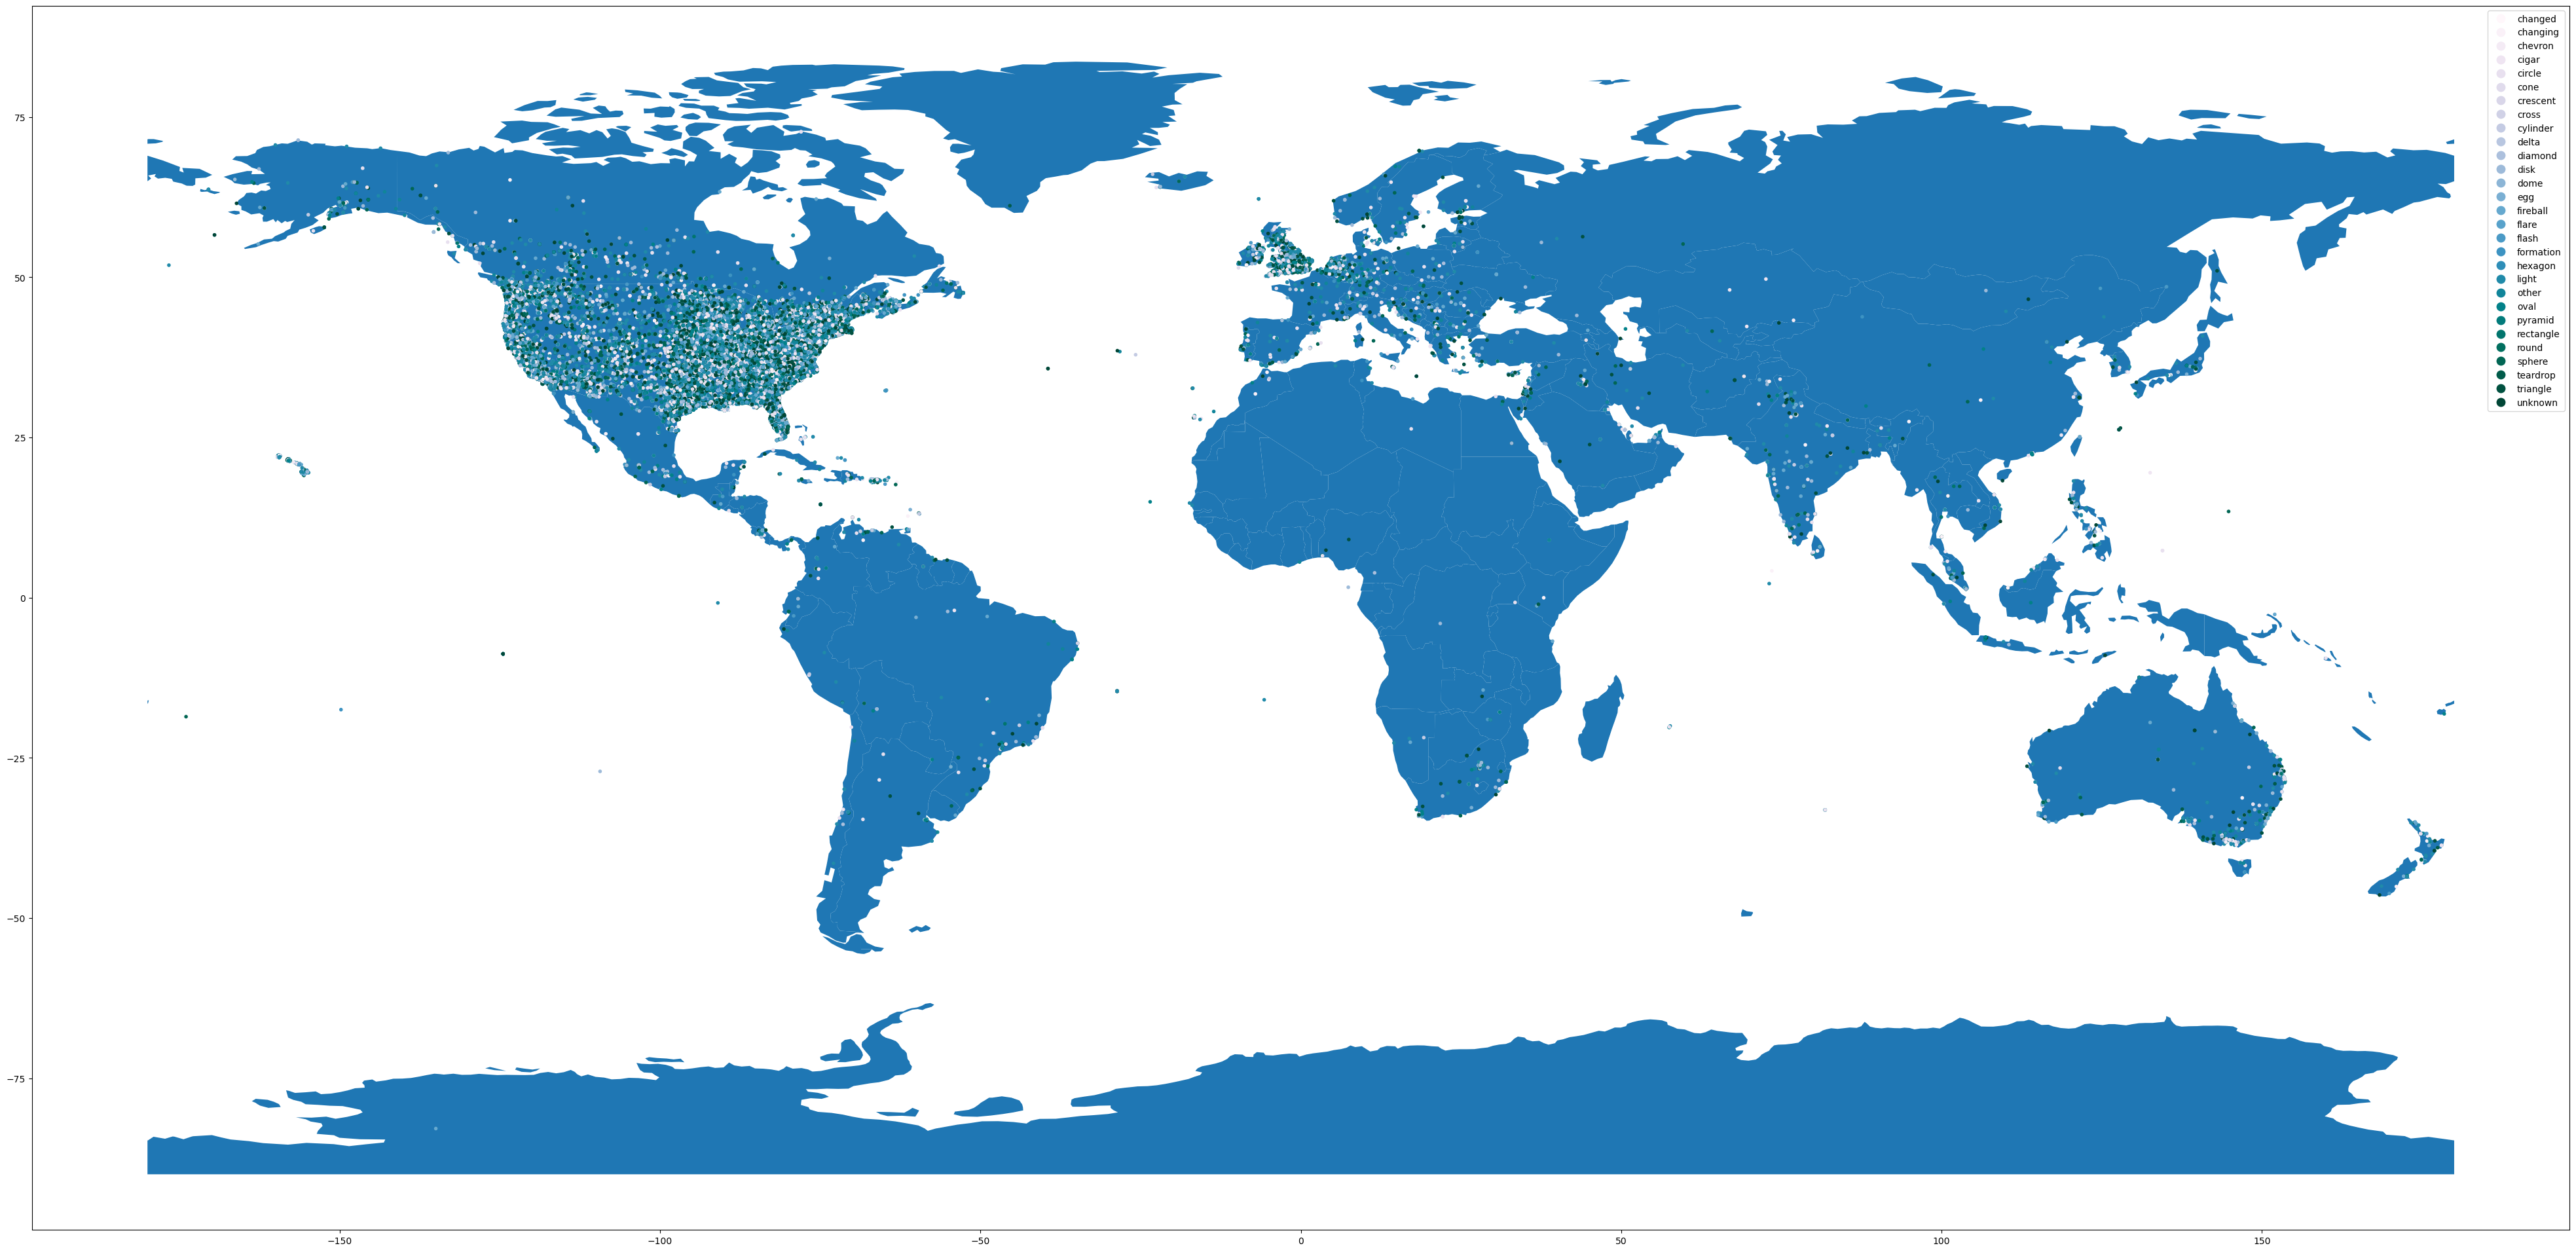

In [17]:
# geopandas
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(50, 25)), marker='o', column='shape', cmap='PuBuGn', markersize=9, legend=True);

In [56]:
# convert seconds to minutes
df["duration (minutes)"] = [int(v)/60 for i,v in df["duration (seconds)"].items()]

# let's create subsets of our 80,000 here: 
# we can implement conditionals, remove/analyze outliers, 
# & will enable for back referencing when starting to run 
# robust AI-ML modeling that would otherwise take much longer to run.

# let's create subsets from the main dataframe/reporting-data w/ respect to duration of observations
df_under100 = df[df["duration (minutes)"]<100]
df_under60 = df[df["duration (minutes)"]<60]

# shape-focused
circles = df[df['shape'] == 'circle']
lights = df[df['shape'] == 'light']
teardrops = df[df['shape'] == 'teardrop']

# year-month
df['year_month'] = df['date posted'].dt.to_period('M')

## Seaborn - CatPlot
This is a sample of 1000 of the 80,0000 observations - Duration under 60 minutes. 

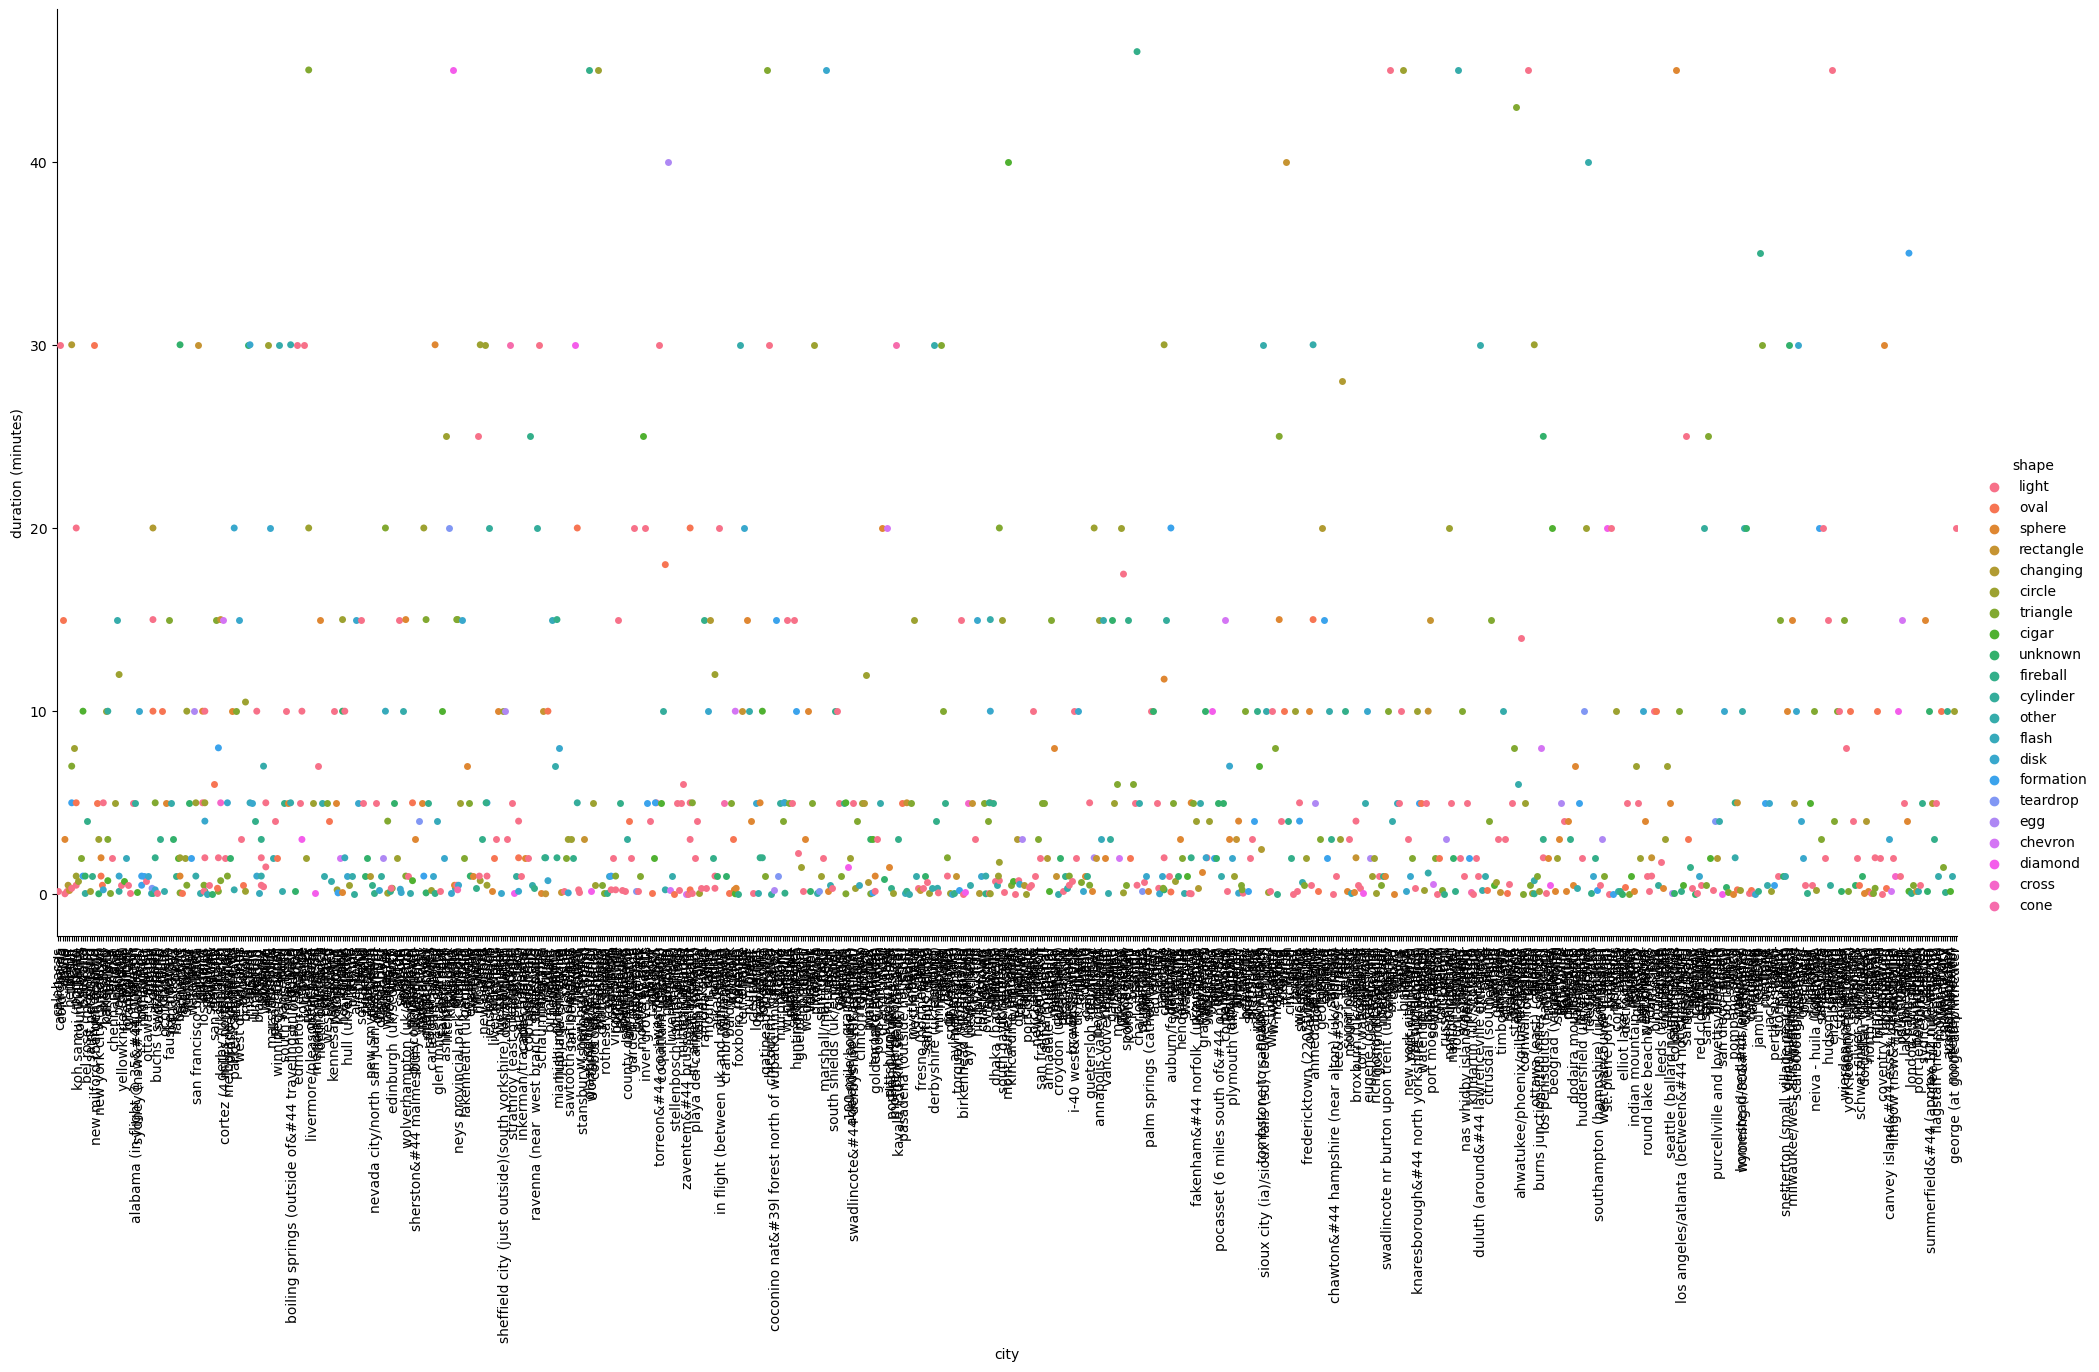

In [21]:
# plot a sample of 1000 observations that lasted under 60 minutes
# need to get a smaller sample of city-set, the x-axis is way too muddled.
sns.catplot(data=df_under60.sample(1000), x="city", y="duration (minutes)", hue="shape", kind="swarm", height=10, aspect=2)
plt.xticks(rotation=90)
plt.show()

This is a sample of 1000 observations of only shape identified as "lights".

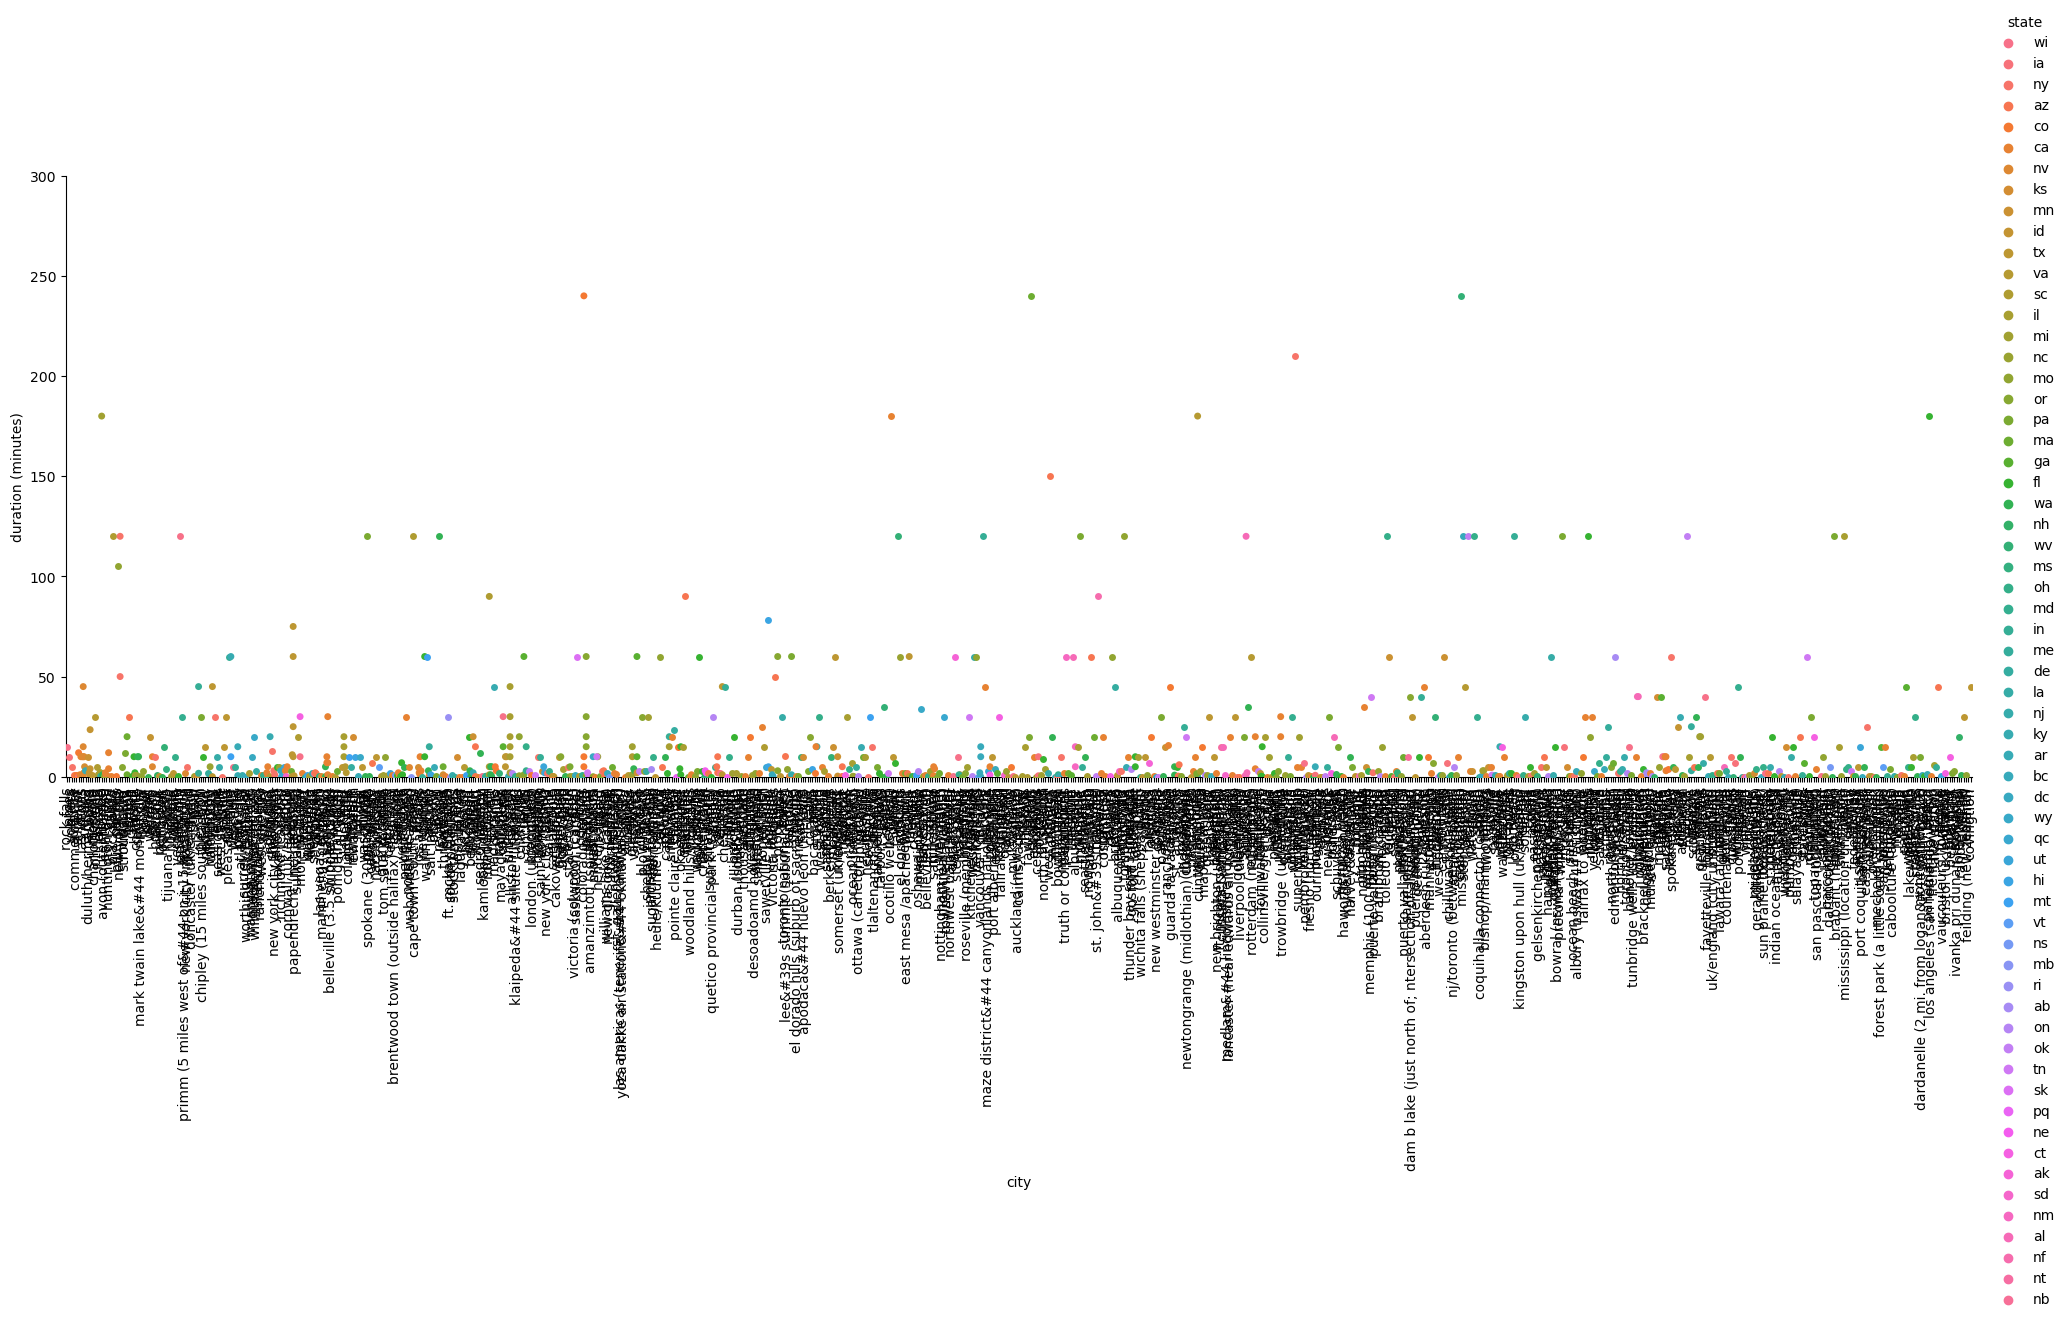

In [54]:
# plot a sample of 500 observations that lasted under 60 minutes
# need to get a smaller sample of city-set, the x-axis is way too muddled.
sns.catplot(data=lights.sample(1000), x="city", y="duration (minutes)", hue="state", kind="swarm", height=10, aspect=2)
plt.xticks(rotation=90)
plt.ylim(top=300)
plt.ylim(bottom=0)
plt.show()

This graph uses the "duration (minutes)" values as the x-axis &  "state" as y-axis.

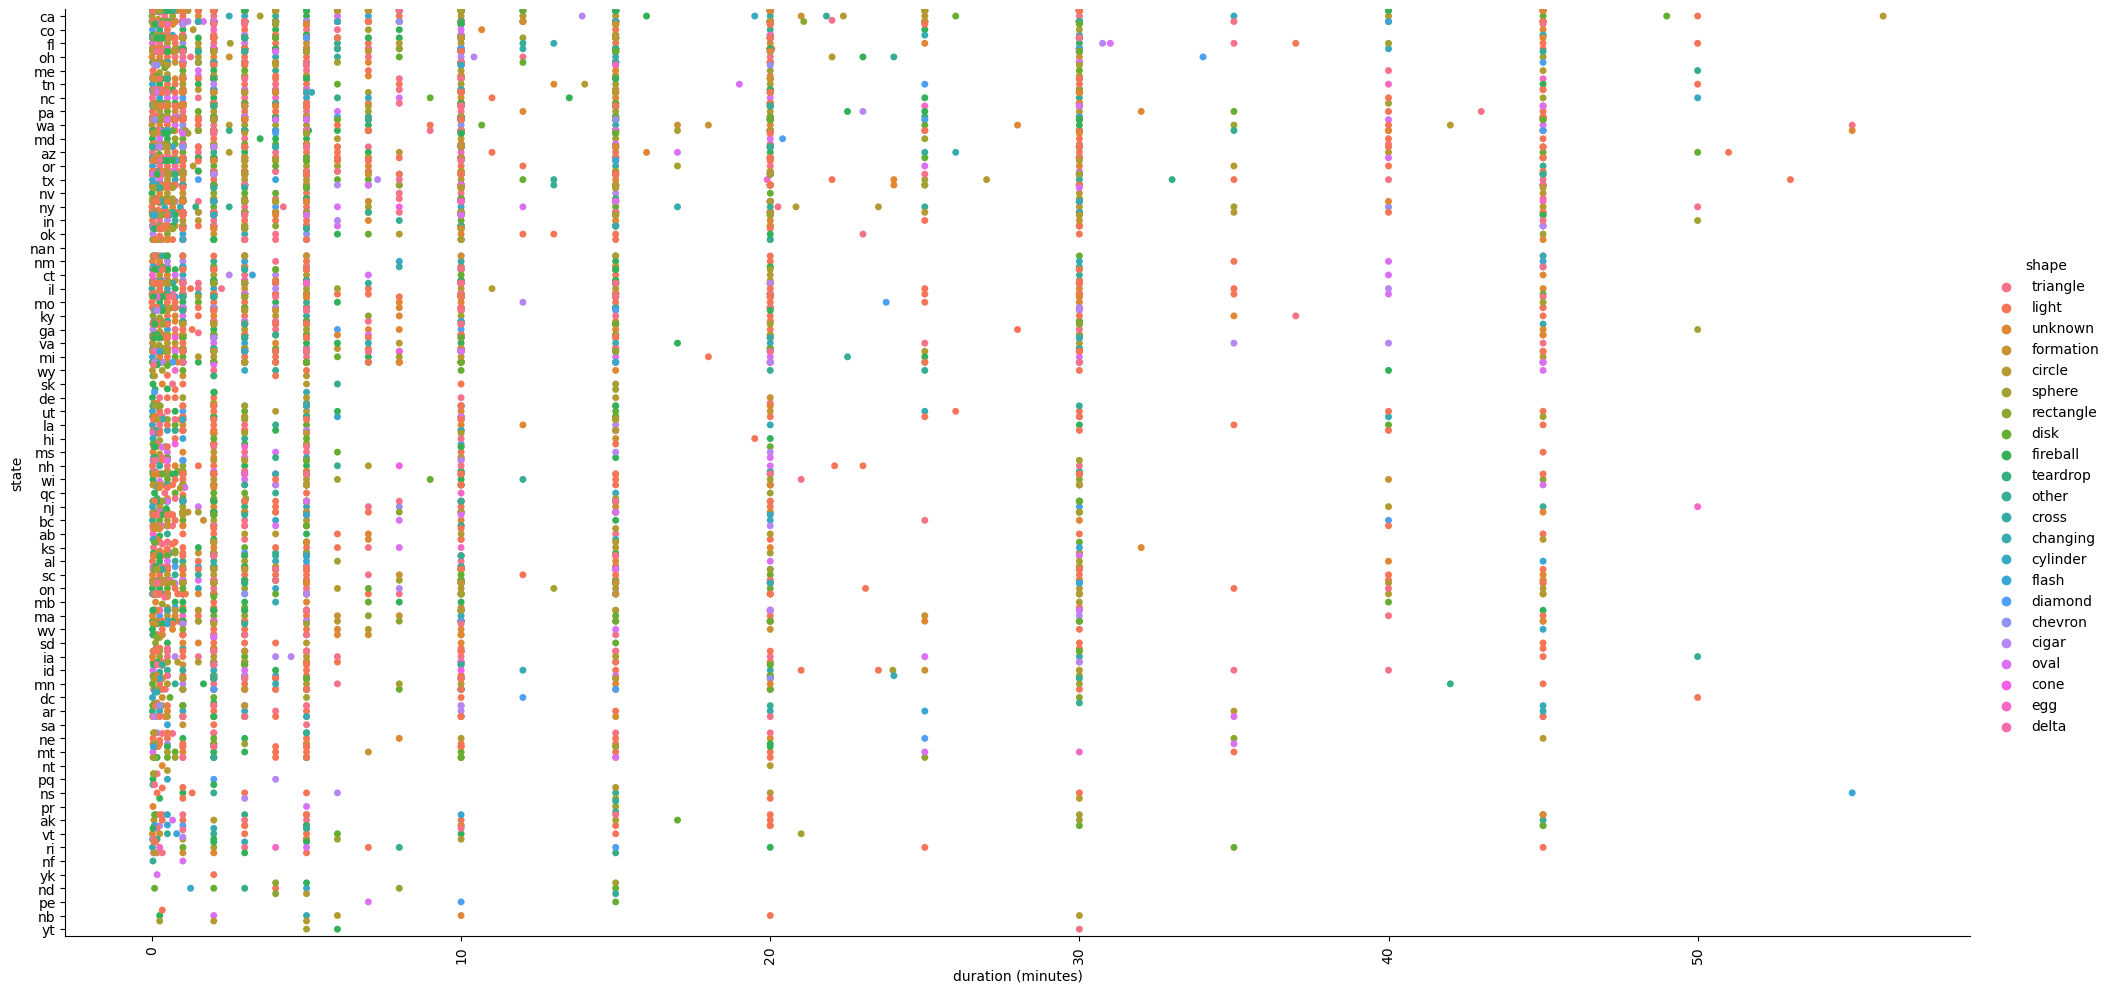

In [8]:
# i think i like the "duration" set as the x-axis & y-axis as "state", instead...
# & let's try for 10000 observations this time...
sns.catplot(data=df_under60.sample(10000), x="duration (minutes)", y="state", hue="shape", kind="swarm", height=10, aspect=2)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# set plot margin limits
#plt.xlim(right=xmax) #xmax is your value
#plt.xlim(left=xmin) #xmin is your value
#plt.ylim(top=ymax) #ymax is your value
#plt.ylim(bottom=ymin) #ymin is your value

## CatPlot•GeoPandas

These show samples of, similar to data above, on the map. 

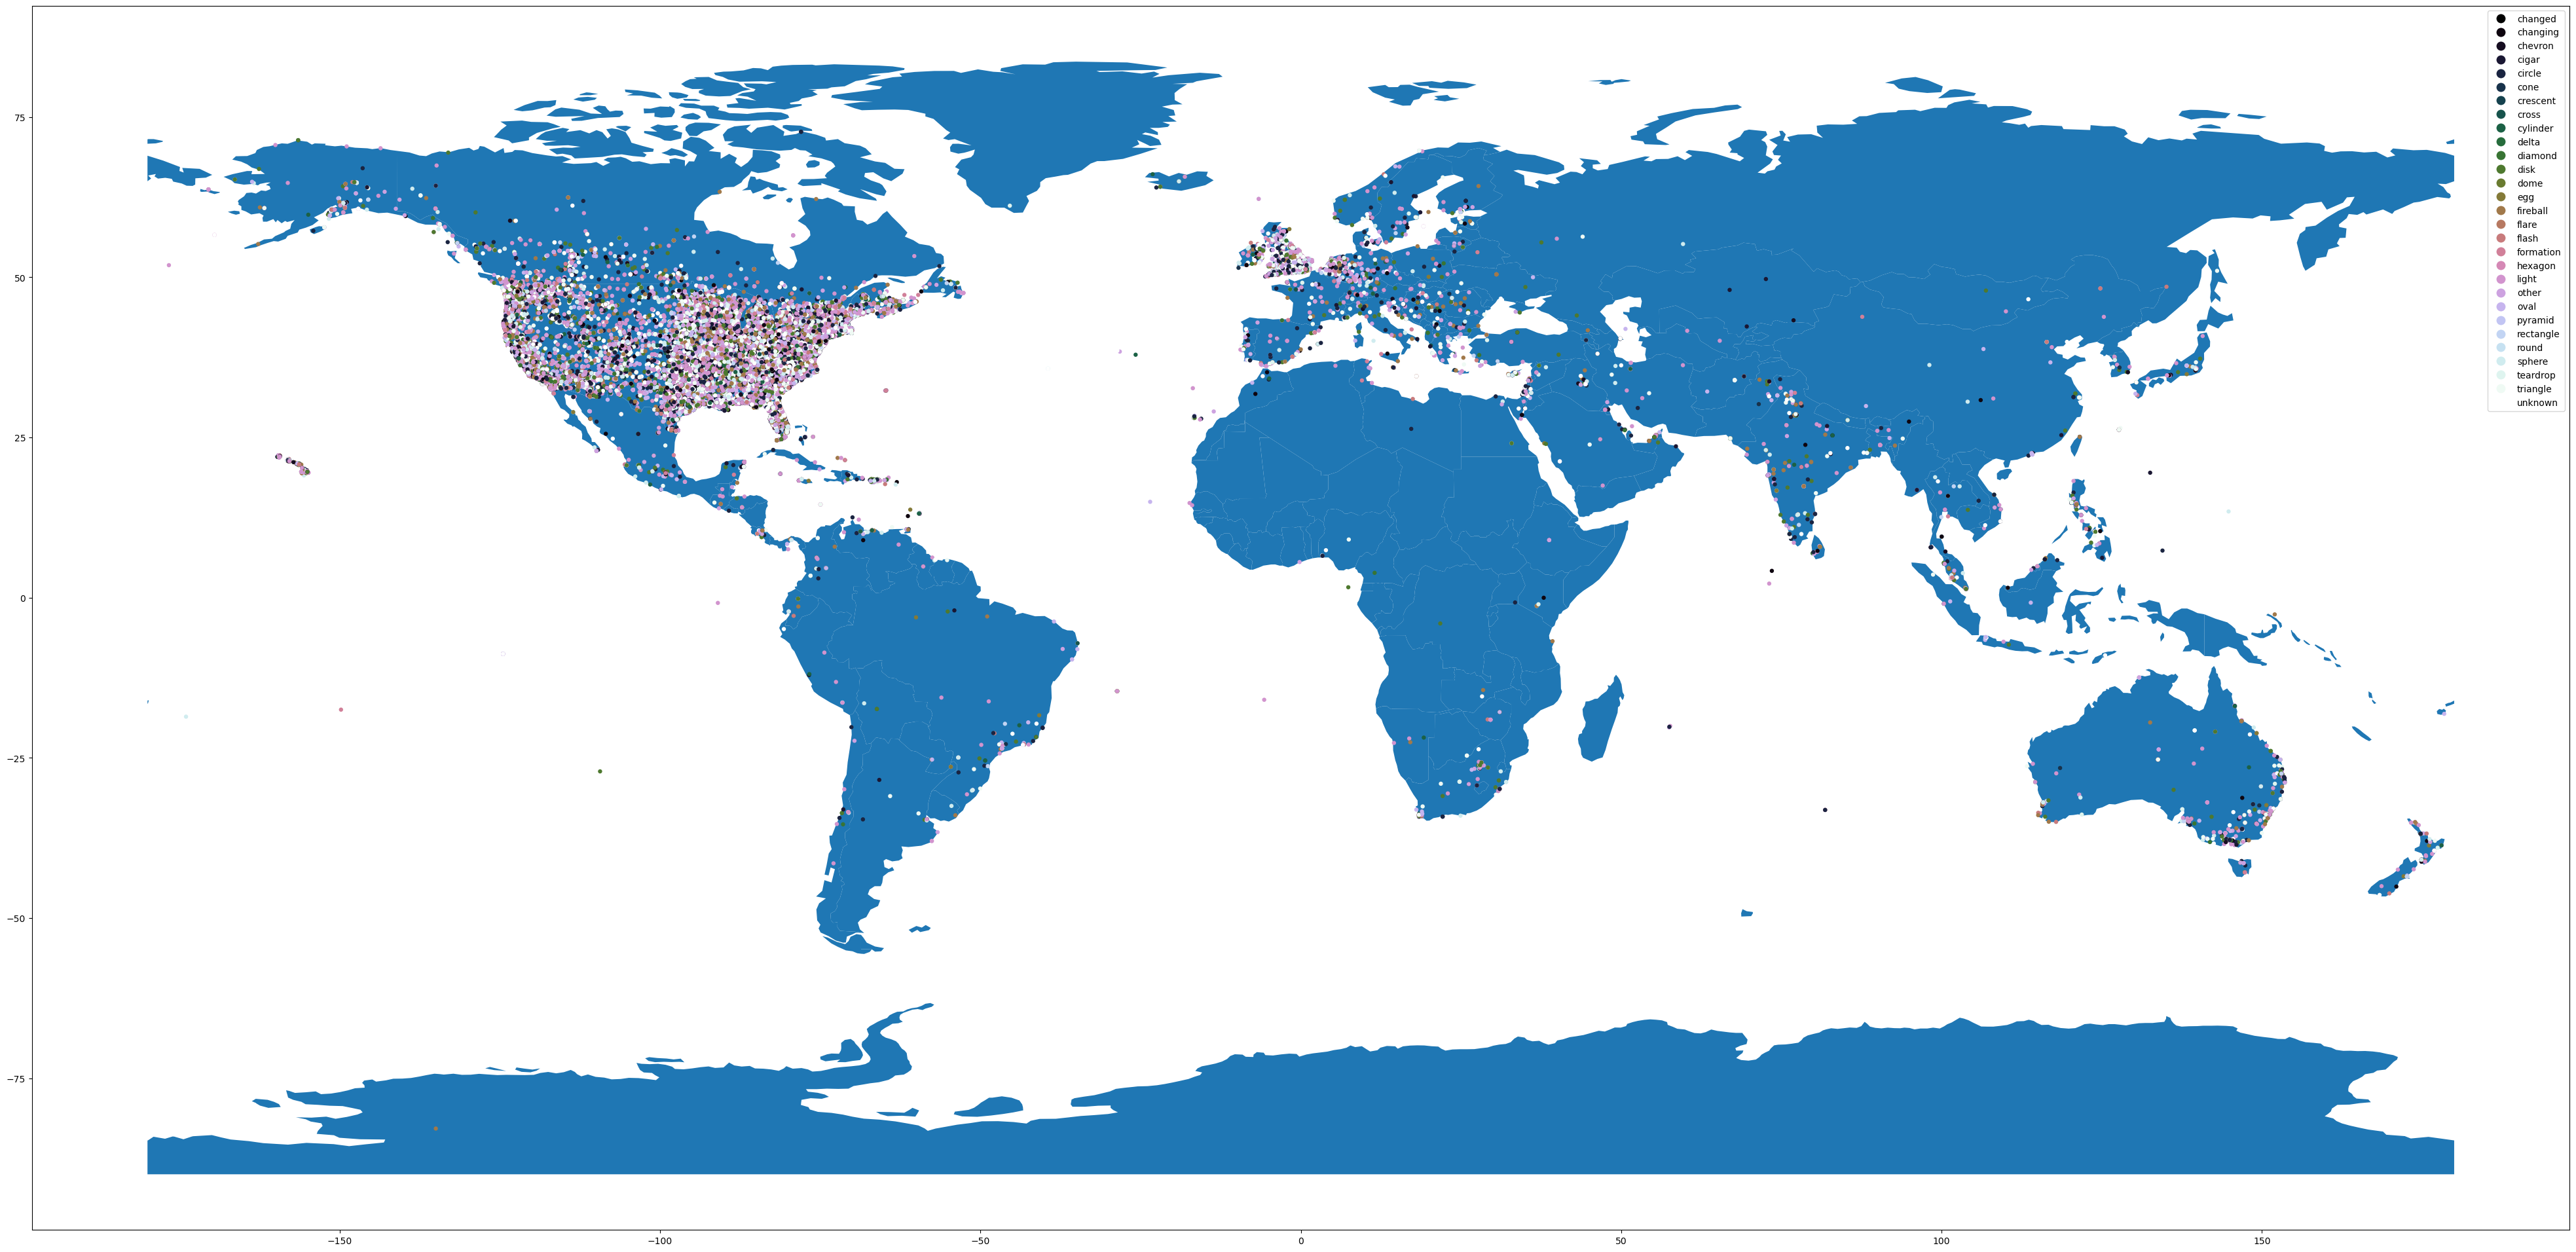

In [10]:
import matplotlib.colors as colors

# df_under100 
# geopandas - using subset data above
geometry = [Point(xy) for xy in zip(df_under100['longitude'], df_under100['latitude'])]
gdf = GeoDataFrame(df_under100, geometry=geometry)   

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(50, 25)), marker='o', column='shape', cmap='cubehelix', markersize=13, legend=True);

This only shows those that were reported shape as "lights".

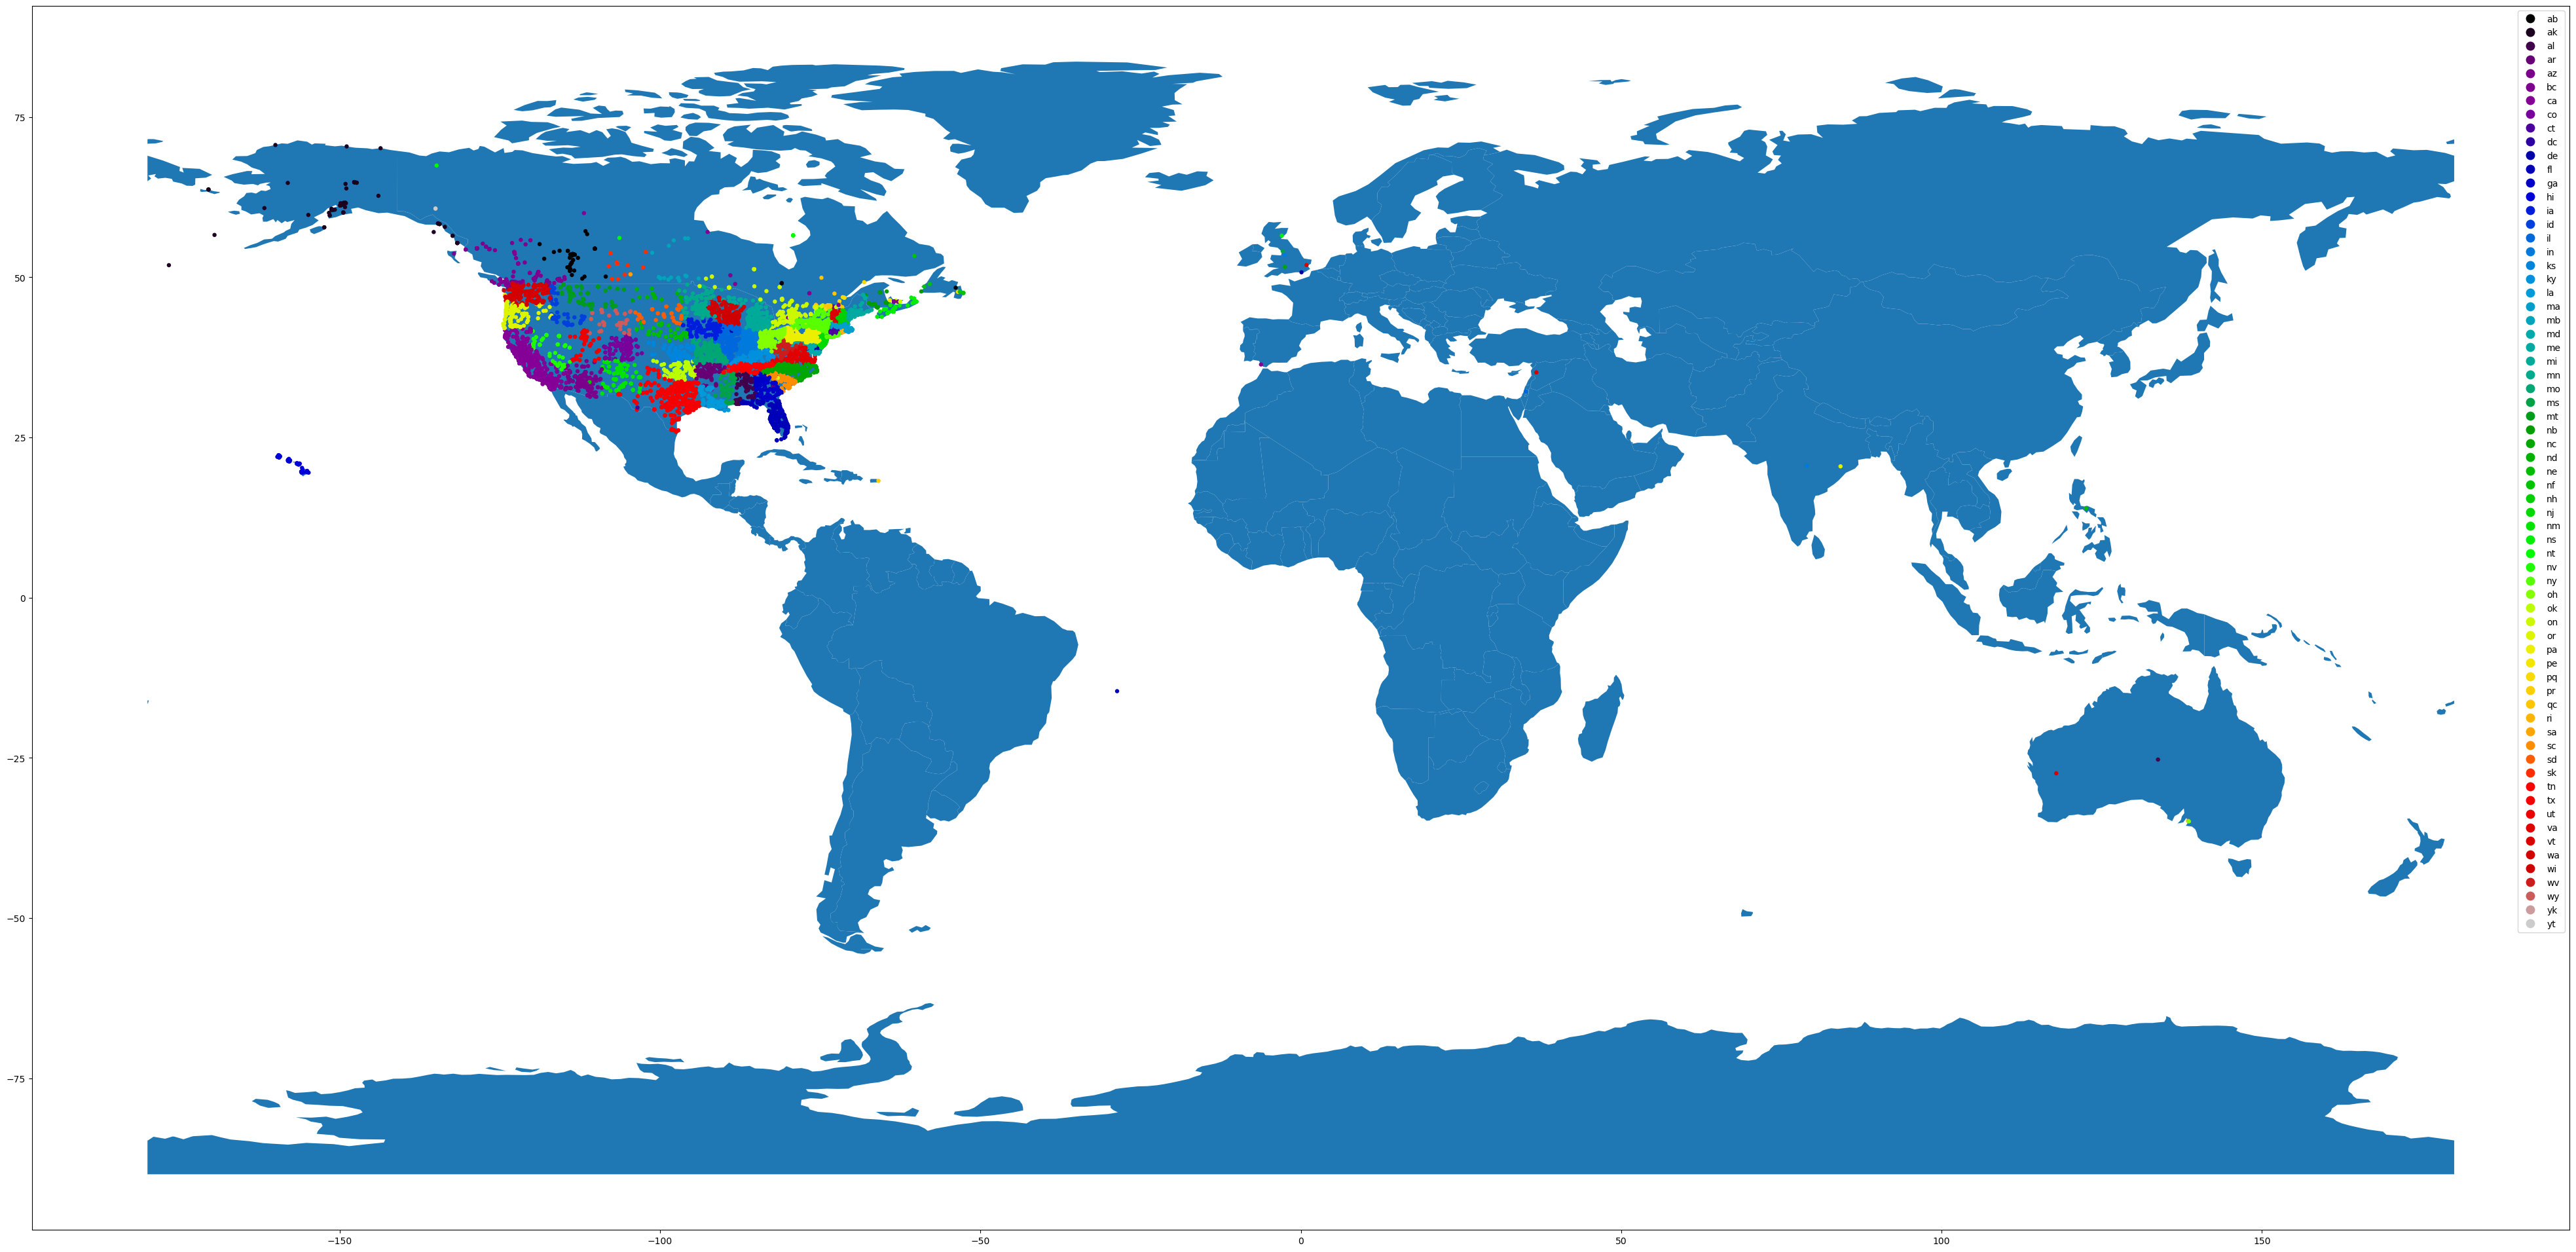

In [59]:
# lights

# geopandas - using subset data above
geometry = [Point(xy) for xy in zip(lights['longitude'], lights['latitude'])]
gdf = GeoDataFrame(lights, geometry=geometry)   

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(50, 25)), marker='o', column='state', cmap='nipy_spectral', markersize=13, legend=True);

This only shows those that were reported shape as "teardrops".

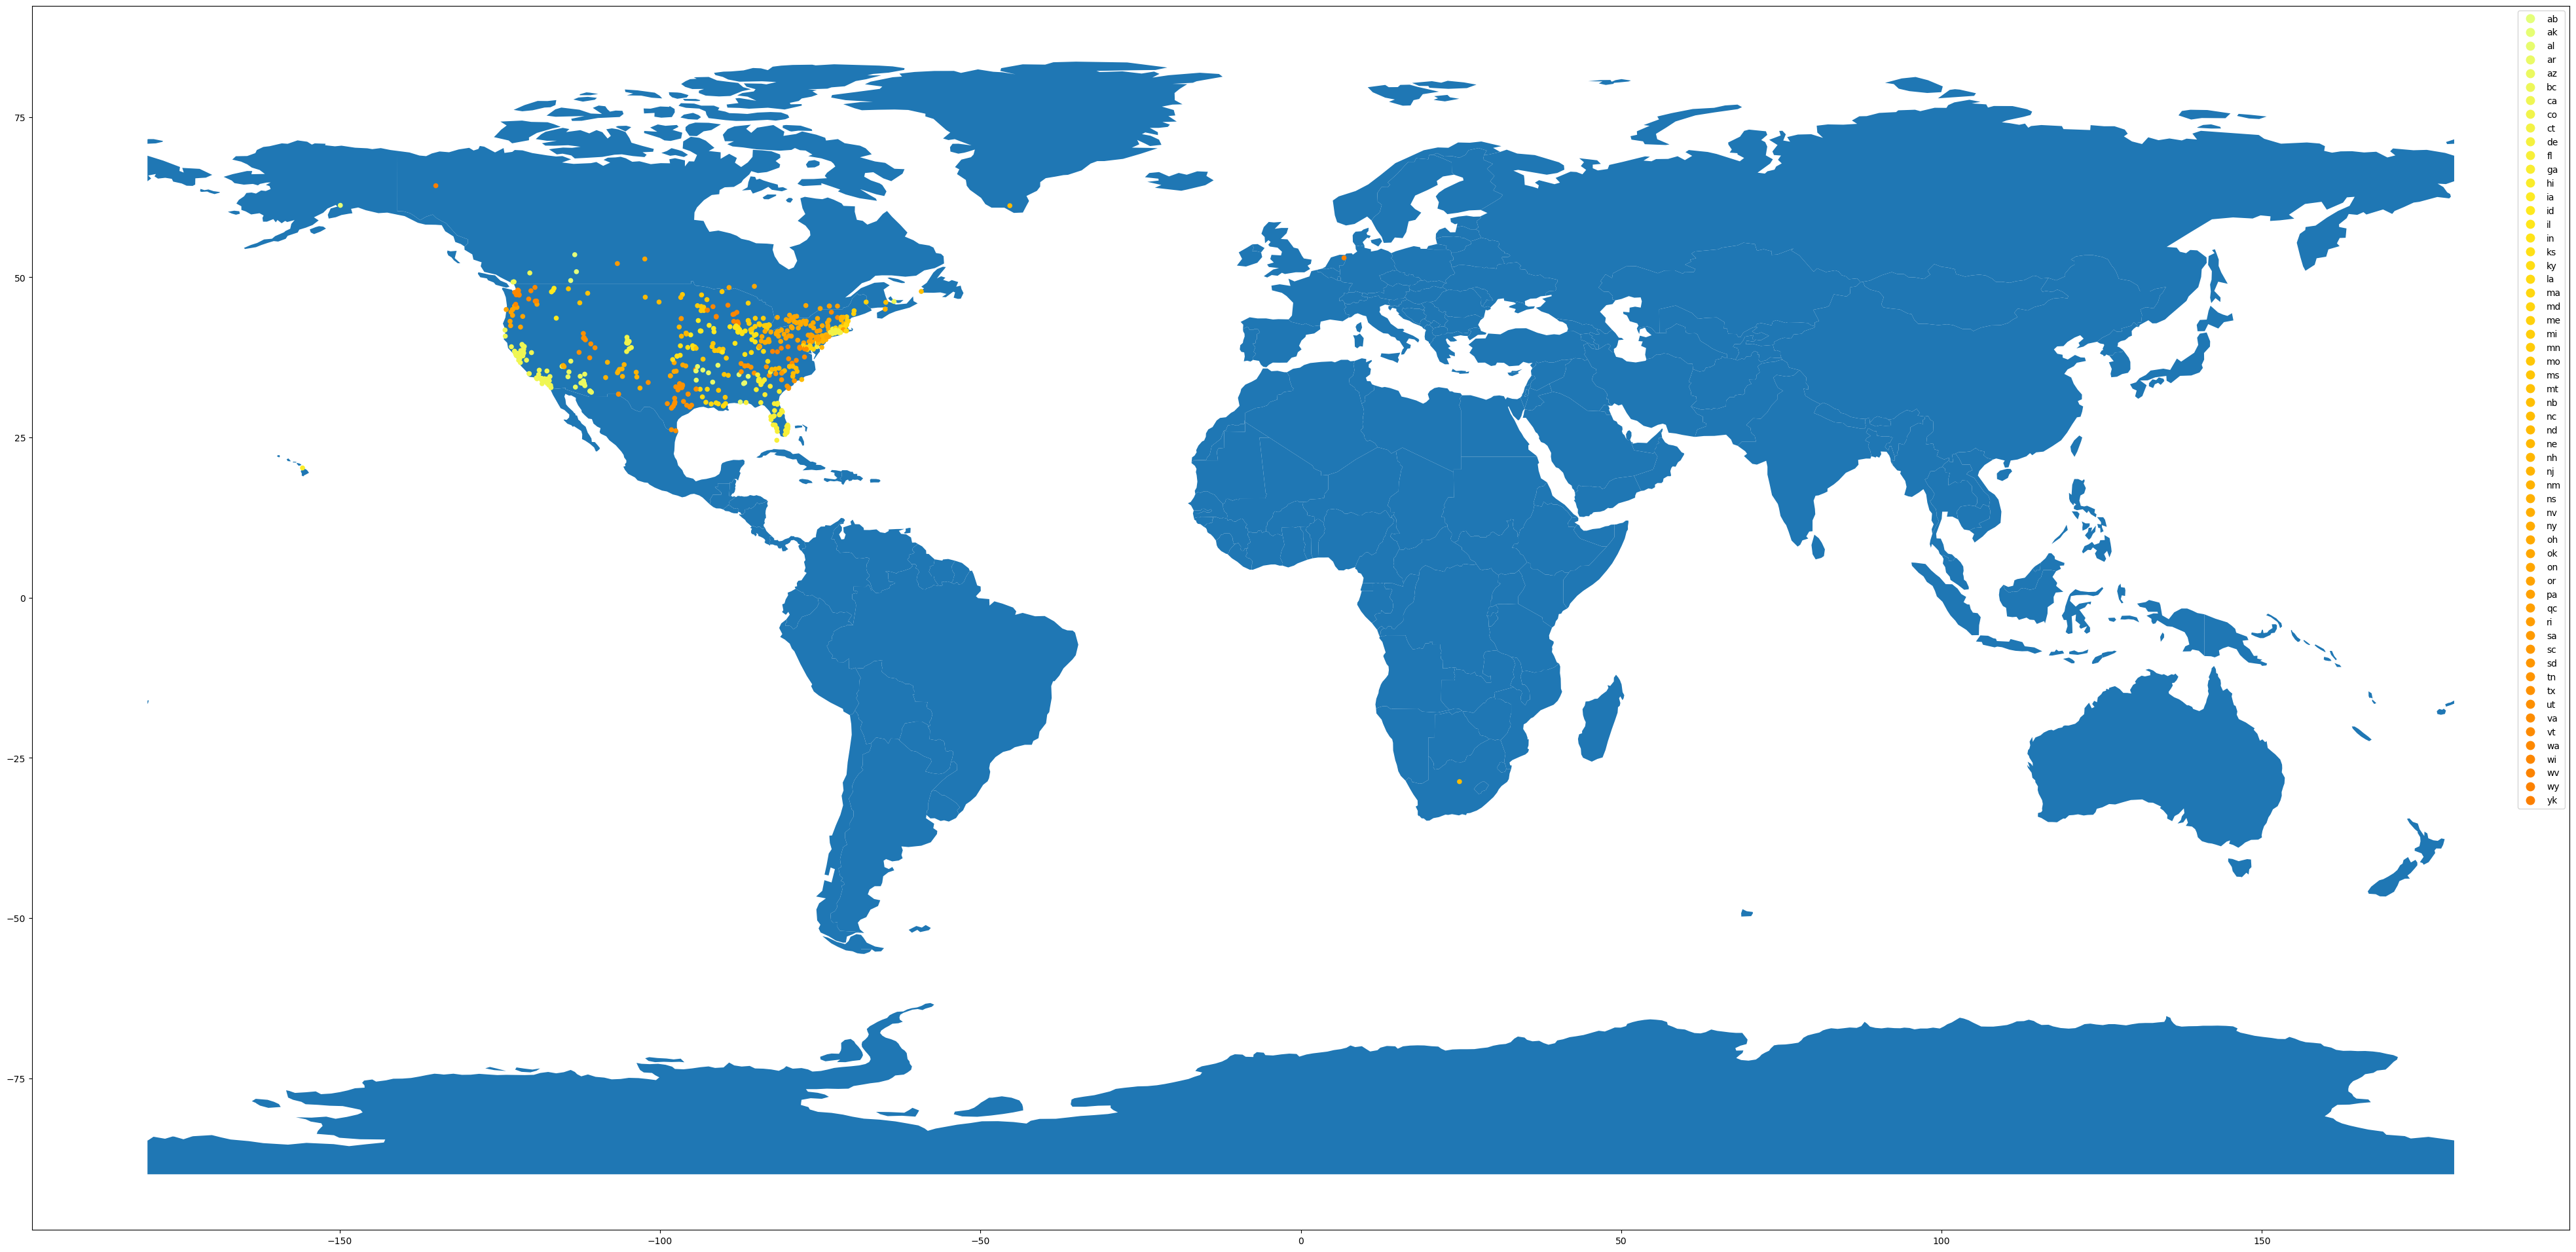

In [62]:
# teardrops

# geopandas - using subset data above
geometry = [Point(xy) for xy in zip(teardrops['longitude'], teardrops['latitude'])]
gdf = GeoDataFrame(teardrops, geometry=geometry)   

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(50, 25)), marker='o', column='state', cmap='Wistia', markersize=20, legend=True);

### More subsets of the data being mapped.

Observations with duration between 20 - 30mins 

## Bokeh

### More coming very soon... stand by.

### Stop here - still needs work. Busy week ahead, so standby for updates ;)
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show

df = df.copy()  # since we are modifying data

group = df.groupby('year_month')
source = ColumnDataSource(group)

p = figure(y_range=group, x_range=(9.5,12.7), width=400, height=550, toolbar_location=None,
           title="Title")
p.hbar(y="year_month", left='shape', right='country', height=0.4, source=source)

p.ygrid.grid_line_color = None
p.xaxis.axis_label = "What?"
p.outline_line_color = None

show(p)

# Analysis

# Data Science

# AI - Implementation

# ML - Implementation

# Conclusion

# Notes & Recommendations

### G. Stephenson
Try adding a time sort too to look for correlating events and to possibly form tracks from multiple sightings of the same object. 

Tracks will be especially challenging as these objects are non-ballistic & non-aerodynamic, and have very large spatial 'windows' from sample to sample, i.e. can jump all over the place. So I would recommend starting with a time sort only, and see what the data tells you.


cmap
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter',




https://medium.com/@jl_ruiz/plot-maps-from-the-us-census-bureau-using-geopandas-and-contextily-in-python-df787647ef77

